In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder 
%matplotlib inline

In [2]:
df = pd.read_csv('part1.csv', header=0, sep=',')
columns = ['CELL', 'SMEAR', 'INFIL', 'LI', 'BLAST', 'TEMP']
X = df.iloc[:, 1:-1].values
Y = df.iloc[:, :1].values

# Visualizing the data set

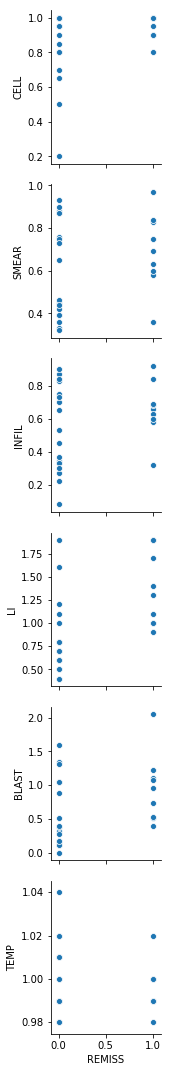

In [3]:
pp = sn.pairplot(data=df,
                  y_vars=columns,
                  x_vars=['REMISS'])

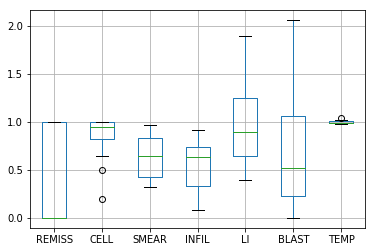

In [4]:
df.boxplot()

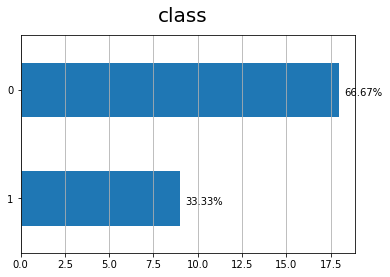

In [5]:
ax = df['REMISS'].value_counts().sort_values().plot(kind="barh")
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
ax.grid(axis="x")
plt.suptitle('class', fontsize=20)
plt.show()

# Splitting the data into train and test set

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0, stratify=Y)

# 10-Fold Cross Validation

In [7]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=10)
accuracy_logistic = []

In [8]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train.ravel())
    return model.score(X_test, y_test)

# Traning the model

In [9]:
for train_index, test_index in folds.split(X,Y):
    
    X_train, X_test, y_train, y_test = X[train_index], X[test_index],Y[train_index], Y[test_index]  
    clf = LogisticRegression(solver='liblinear',multi_class='ovr')
    accuracy_logistic.append(get_score(clf, X_train, X_test, y_train, y_test))  

C:\Users\vnizam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:652: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)


In [10]:
accuracy_logistic

[1.0,
 0.3333333333333333,
 0.6666666666666666,
 0.6666666666666666,
 1.0,
 0.6666666666666666,
 0.6666666666666666,
 0.6666666666666666,
 0.0,
 1.0]

# Accuracy of the model

In [11]:
print("The accuracy of the mode is",sum(accuracy_logistic)/10)

The accuracy of the mode is 0.6666666666666667


# Confusion matrix

In [12]:
y_pred = clf.predict(X)
confusion_matrix(Y,y_pred)


array([[16,  2],
       [ 6,  3]], dtype=int64)

# Coefficient and intercepts of the logistic regression

In [13]:
print(clf.coef_)
print(clf.intercept_)

[[-3.55739566e-01 -3.04337811e-01  1.78050354e-04  7.47052597e-01
   4.23158649e-01]]
[-1.03403189]


# Correlation between the attributes

Text(0.5, 1.0, 'pearson correlation')

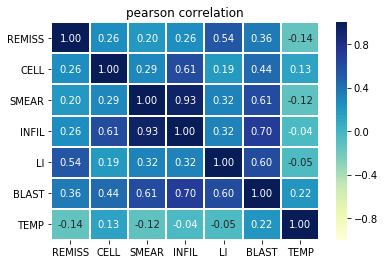

In [14]:
corr_matrix = df.copy()
for col in corr_matrix.columns:
    if corr_matrix[col].dtype == "O":
         corr_matrix[col] = corr_matrix[col].factorize(sort=True)[0]
corr_matrix = corr_matrix.corr(method="pearson")
sn.heatmap(corr_matrix, vmin=-1., vmax=1., annot=True, fmt='.2f', cmap="YlGnBu", cbar=True, linewidths=1)
plt.title("pearson correlation")